In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_students = pd.read_csv(r'C:\Users\17097\Documents\Memorial University\CS 4304\datasets\students1.csv')
df_iris = pd.read_csv(r'C:\Users\17097\Documents\Memorial University\CS 4304\datasets\iris.csv')

In [3]:
df_students.head()

,REF_DATE,GEO,Institution type,Registration status,International Standard Classification of Education (ISCED),Field of study,Gender,Status of student in Canada,VALUE
0,2018/2019,Newfoundland and Labrador,University,Full-time student,Bachelor's or equivalent,Education [1],Male gender,Canadian students,129
1,2018/2019,Newfoundland and Labrador,University,Full-time student,Bachelor's or equivalent,Education [1],Male gender,International students,3
2,2018/2019,Newfoundland and Labrador,University,Full-time student,Bachelor's or equivalent,Education [1],Female gender,Canadian students,243
3,2018/2019,Newfoundland and Labrador,University,Full-time student,Bachelor's or equivalent,Education [1],Female gender,International students,3
4,2018/2019,Newfoundland and Labrador,University,Full-time student,Bachelor's or equivalent,Education [1],Gender unknown,Canadian students,3


In [4]:
df_students.columns

Index(['REF_DATE', 'GEO', 'Institution type', 'Registration status',
       'International Standard Classification of Education (ISCED)',
       'Field of study', 'Gender', 'Status of student in Canada', 'VALUE'],
      dtype='object')

In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Question 1

In [6]:
df1 = df_students.groupby(['Field of study', 'GEO']).sum().reset_index()

In [7]:
df1

,Field of study,GEO,VALUE
0,"Agriculture, natural resources and conservatio...",Alberta,4059
1,"Agriculture, natural resources and conservatio...",British Columbia,5313
2,"Agriculture, natural resources and conservatio...",Manitoba,1497
3,"Agriculture, natural resources and conservatio...",New Brunswick,645
4,"Agriculture, natural resources and conservatio...",Newfoundland and Labrador,393
...,...,...,...
146,Visual and performing arts and communications ...,Ontario,38367
147,Visual and performing arts and communications ...,Prince Edward Island,207
148,Visual and performing arts and communications ...,Quebec,21006
149,Visual and performing arts and communications ...,Saskatchewan,564


In [8]:
df1.sort_values(by = 'VALUE', ascending = False).drop_duplicates(subset = 'Field of study', keep = 'first')

,Field of study,GEO,VALUE
28,"Business, management and public administration...",Ontario,171693
125,Social and behavioural sciences and law [4],Ontario,136701
17,"Architecture, engineering and related technolo...",Ontario,114720
50,Health and related fields [10],Ontario,113781
63,Humanities [3],Quebec,80022
114,Physical and life sciences and technologies [6],Ontario,70554
135,Unclassified,Ontario,59196
72,"Mathematics, computer and information sciences...",Ontario,48171
146,Visual and performing arts and communications ...,Ontario,38367
41,Education [1],Quebec,35373


### Question 2

Text(0.5, 1.0, 'Full-time Canadian Students (2018)')

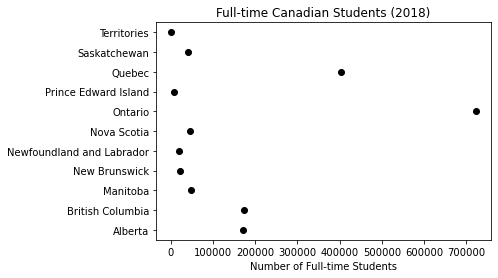

In [9]:
df2 = df_students[df_students['Registration status'] == 'Full-time student'].groupby('GEO').sum().reset_index()

plt.scatter(df2['VALUE'], df2['GEO'], color = 'black')
plt.xlabel('Number of Full-time Students')
plt.title('Full-time Canadian Students (2018)')

### Question 3

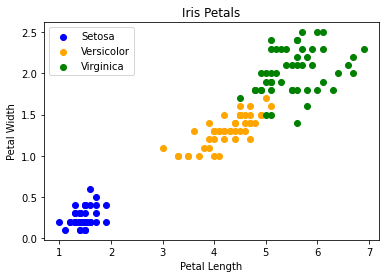

In [10]:
x = plt.scatter(df_iris[df_iris.species == 'setosa']['petal_length'], df_iris[df_iris.species == 'setosa']['petal_width'], color = 'blue')
y = plt.scatter(df_iris[df_iris.species == 'versicolor']['petal_length'], df_iris[df_iris.species == 'versicolor']['petal_width'], color = 'orange')
z = plt.scatter(df_iris[df_iris.species == 'virginica']['petal_length'], df_iris[df_iris.species == 'virginica']['petal_width'], color = 'green')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Petals')

plt.legend([x, y, z], ['Setosa', 'Versicolor', 'Virginica'])

### Question 4

<ipython-input-11-19ce9c706ecf>:14: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  ax.locator_params(tight=True, nbins=12)


([<matplotlib.axis.YTick at 0x2095c57e310>,
 [Text(0, 2.0, 'Setosa'),
  Text(0, 1.0, 'Versicolor'),
  Text(0, 0.0, 'Virginica')])

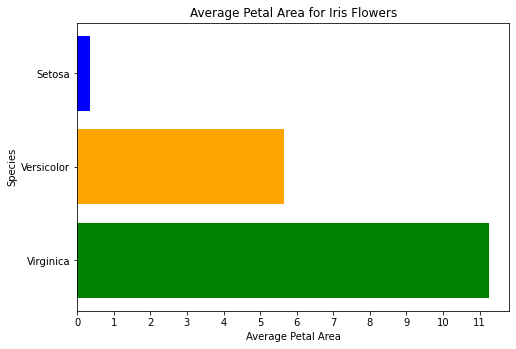

In [11]:
df4 = df_iris[['petal_length', 'petal_width', 'species']].groupby('species').mean().reset_index()
df4['avg_petal_area'] = df4['petal_length'] * df4['petal_width']
df4 = df4.iloc[:: -1]
df4

fig = plt.figure()

ax = fig.add_axes([0.0, 0.0, 1.0, 1.0])
ax.barh(df4['species'], df4['avg_petal_area'], color = ['green', 'orange', 'blue'])
ax.set_title('Average Petal Area for Iris Flowers')
ax.set_xlabel('Average Petal Area')
ax.set_ylabel('Species')

ax.locator_params(tight=True, nbins=12)
y = ['setosa', 'versicolor', 'virginica']
values = ['Setosa', 'Versicolor', 'Virginica']
plt.yticks(y, values)